In [26]:
import os
from string import punctuation, digits

In [27]:
from bs4 import BeautifulSoup

In [28]:
punctuation = punctuation + '«»—–…“”\n\t' + digits

In [29]:
def text_to_string(filename):
    """Читаем XML и возвращаем текстовую строку."""
    append_text = []
    with open(filename, encoding='utf-8') as infile:
        soup = BeautifulSoup(infile.read(), "html.parser")
        for p in soup.find_all('p'):
            append_text.append(p.text)
    return '\n'.join(append_text)

In [30]:
strings_by_author = dict()
dir = 'texts'
for fl_name in os.listdir(dir):
    strings_by_author[fl_name.split('.')[0]] = text_to_string(os.path.join(dir, fl_name))

In [32]:
def make_word_dict(strings_by_author):
    """Возвращаем словарь слов-токенов корпусов по автору.
    Не используем токенайзер из NLTK, потому что для русского 
    его подключать сложно и не нужно"""
    words_by_author = dict()
    for text in strings_by_author:
        tokens = strings_by_author[text].split()
        words_by_author[text] = [token.lower().strip(punctuation) 
                                  for token in tokens if token.strip(punctuation)]
    return words_by_author

In [35]:
strings_by_author['unknown'] = strings_by_author['leskov_013'] # Угадывать будем авторство повести Лескова «Смех и горе»
del strings_by_author['leskov_013']

In [36]:
words_by_author = make_word_dict(strings_by_author)

In [37]:
def find_shortest_corpus(words_by_author):
    """Вернуть длину самого короткого корпуса."""
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.
              format(author, len(words_by_author[author])))
        len_shortest_corpus = min(word_count)
        print('length shortest corpus = {}\n'.format(len_shortest_corpus))
        return len_shortest_corpus

In [38]:
len_shortest_corpus = find_shortest_corpus(words_by_author)


Number of words for turgenev_otsy_i_deti = 46101

length shortest corpus = 46101



In [88]:
import matplotlib.pyplot as plt
from collections import Counter

In [83]:
def CountFrequency(my_list):
    """Составляем частотный словарь длин"""
    c = Counter()
    for word in my_list:
        c[word] += 1
    return count

In [89]:
by_author_length_freq_dist = dict()
for i, author in enumerate(words_by_author):
    word_lengths = [len(word) for word in words_by_author[author]
                [:len_shortest_corpus]]
    by_author_length_freq_dist[author] = CountFrequency(word_lengths)
by_author_length_freq_list = dict()
for author in by_author_length_freq_dist:
    by_author_length_freq_list[author] = []
    i = 0
    for word in sorted(by_author_length_freq_dist[author]):
        by_author_length_freq_list[author].append(by_author_length_freq_dist[author][word])
        i += 1 
        if i > 9:
            break

In [94]:
def word_length_test(words_by_author, len_shortest_corpus):
    """Распределение частотности длины слов в корпусах по автору, по самому
    короткому корпусу."""
    by_author_length_freq_dist = dict()
    plt.figure()
    plt.figure(figsize=(18,12))
    plt.ion()
    
    for author in by_author_length_freq_list:
        plt.plot(by_author_length_freq_list[author], label=author)
        
    plt.title('Длина слова')
    plt.xlabel("Образцы")
    plt.ylabel("Количество")
    plt.grid()
    plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

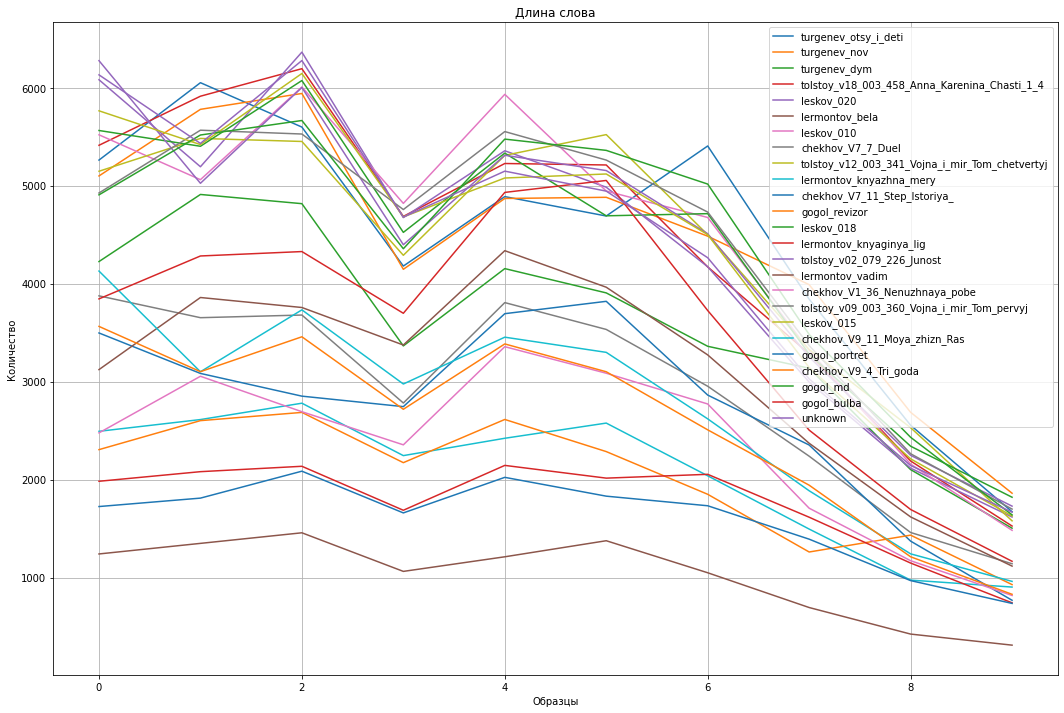

In [95]:
word_length_test(words_by_author, len_shortest_corpus)